# Homework 2: Iris Dataset
Ad Soyad: Önder Görmez  
Öğrenci No: 21501035

In [432]:
import pandas as pd
from sklearn.model_selection import train_test_split
import utils

import seaborn as sns
import numpy as np
from scipy.spatial import distance


# Creating a data frame using CSV files

Split Dataframe using groupby() and grouping by particular dataframe column values: Setosa, Versicolor, Virginica

In [433]:
WORKING_DIR = '/home/onder/Repos/BLM6103_Probability_Random_Variables_and_Stochastic_Processes/02-Homeworks/Homework2/'
FILE_PATH = WORKING_DIR + 'iris.csv'

data_frame = pd.read_csv(FILE_PATH)

# Split Dataframe using groupby() &
# Grouping by particular dataframe column
grouped_df = data_frame.groupby(['variety'])
setosa_df = grouped_df.get_group("Setosa")
print('Setosa: ' + str(setosa_df.shape))
# print(setosa_df)

versicolor_df = grouped_df.get_group("Versicolor")
print('Versicolor: ' + str(versicolor_df.shape))
# print(versicolor_df)

virginica_df = grouped_df.get_group("Virginica")
print('Virginica: ' + str(virginica_df.shape))
# print(virginica_df)


Setosa: (50, 5)
Versicolor: (50, 5)
Virginica: (50, 5)


# Create Training and Test Samples
<div>
  <input type="checkbox" name="checkbox_1" checked>
  <label for="checkbox_1">1- Veri içerisindeki her sınıftaki örneklerin %80’i eğitim ve geri kalanlar test fazına ayırılır.</label>
</div>

In [434]:
train_setosa_df, test_setosa_df = train_test_split(setosa_df, test_size=0.2, random_state=5)
print('Train Setosa: ' + str(train_setosa_df.shape))
print('Test Setosa: ' + str(test_setosa_df.shape))

train_versicolor_df, test_versicolor_df = train_test_split(versicolor_df, test_size=0.2, random_state=40)
print('Train Versicolor: ' + str(train_versicolor_df.shape))
print('Test Versicolor: ' + str(test_versicolor_df.shape))

train_virginica_df, test_virginica_df = train_test_split(virginica_df, test_size=0.2, random_state=27)
print('Train Virginica: ' + str(train_virginica_df.shape))
print('Test Virginica: ' + str(test_virginica_df.shape))


Train Setosa: (40, 5)
Test Setosa: (10, 5)
Train Versicolor: (40, 5)
Test Versicolor: (10, 5)
Train Virginica: (40, 5)
Test Virginica: (10, 5)


# Scatter Plot
<div>
  <input type="checkbox" name="checkbox_2" checked>
  <label for="checkbox_2">2- Eğitim verilerini kullanarak özniteliklerin farklı kombinasyonları ile scatterplot çizilir ve ilinti durumu hesaplanmadan yorumlanır.</label>
</div>

Diyagonal subplotlar her değişkenin kendi dağılımını gösterirken, diyagonal olmayan subplotlar ise iki değişken arasındaki ilintiyi göstermektedir.

Aşağıdaki scatter plotlardan görüldüğü üzere;
* Setosa sınıfında;
  * sepal length ve sepal width arasında pozitif yönlü bir ilinti vardır. Biri artarsa diğeri de artmaktadır.
  * sepal length, sepal witdh veya petal length arttıkça petal witdh değişmemektedir.


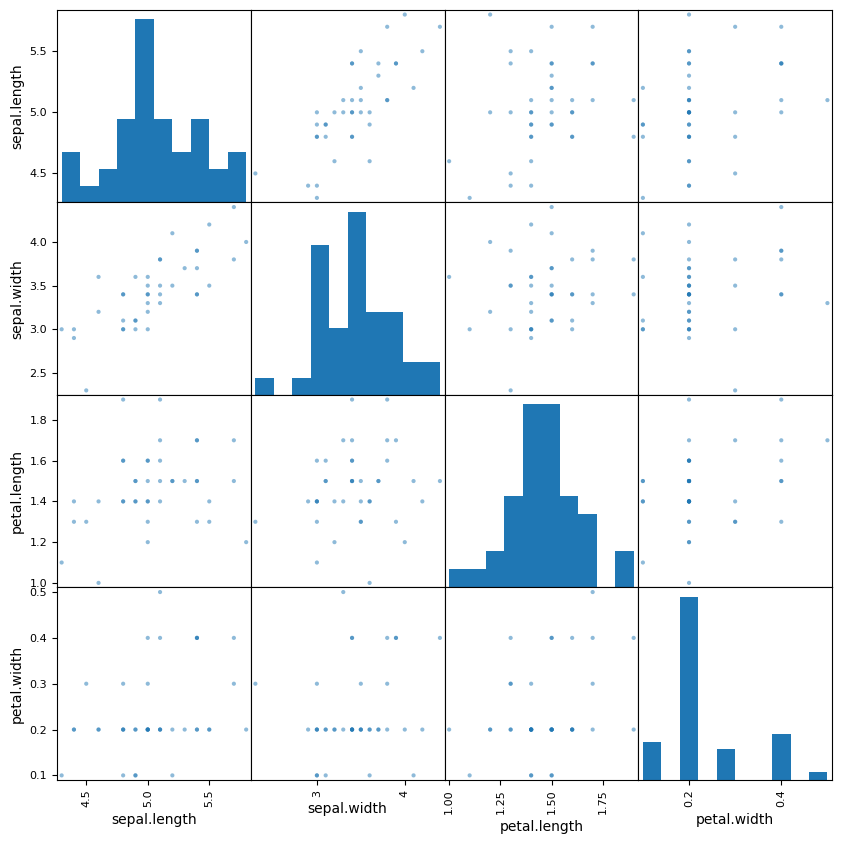

In [435]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a scatter plot matrix
pd.plotting.scatter_matrix(train_setosa_df, figsize=(10, 10))
plt.show()


* Versicolor sınıfında;
  * sepal length ve petal length arasında pozitif yönlü bir ilinti vardır. Biri artarsa diğeri de artmaktadır.
  * sepal length, sepal witdh veya petal length arttıkça petal witdh değişmemektedir.

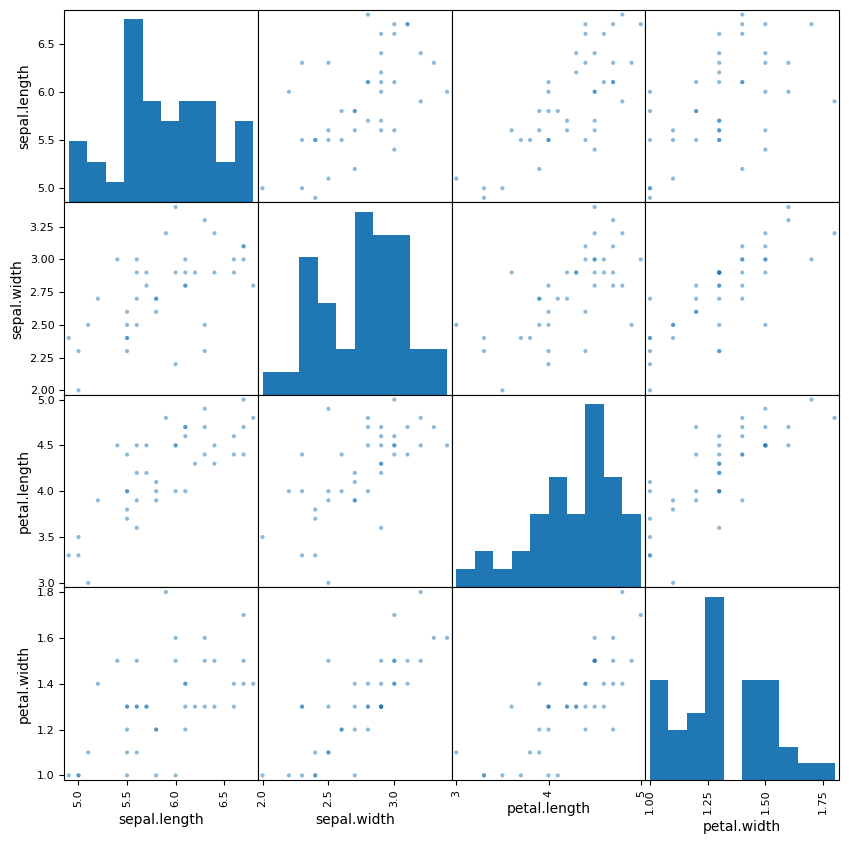

In [436]:
pd.plotting.scatter_matrix(train_versicolor_df, figsize=(10, 10))
plt.show()



* Virginica sınıfında;
  * sepal length ve petal length arasında pozitif yönlü bir ilinti vardır. Biri artarsa diğeri de artmaktadır.

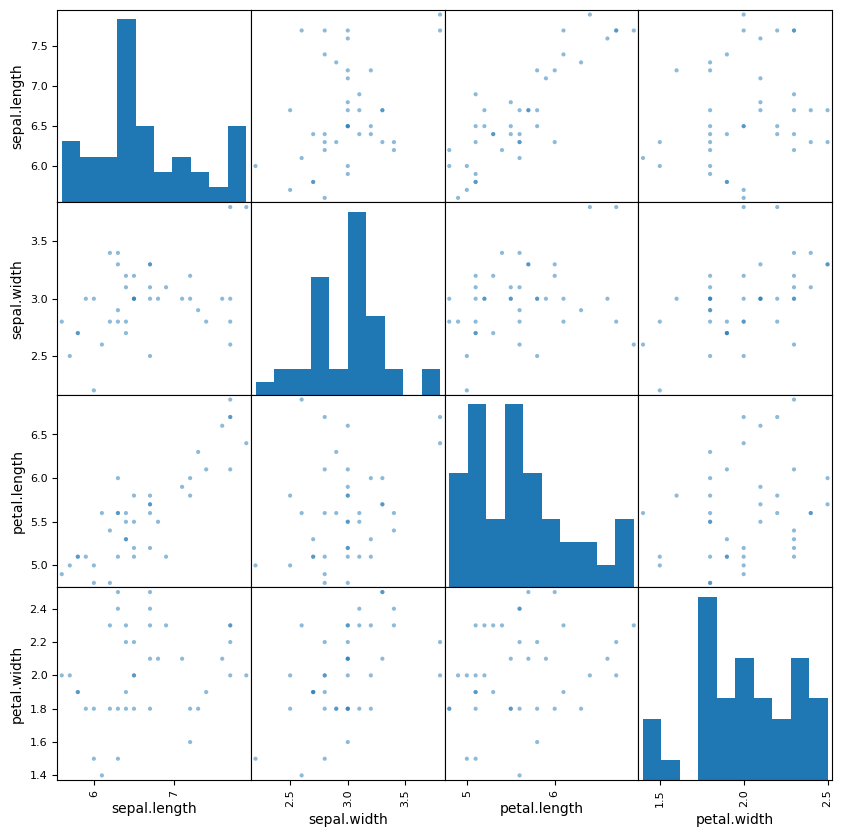

In [437]:
pd.plotting.scatter_matrix(train_virginica_df, figsize=(10, 10))
plt.show()


Tüm dataya birlikte bakarsak aşağıdaki gibi bir scatter plot elde ederiz.

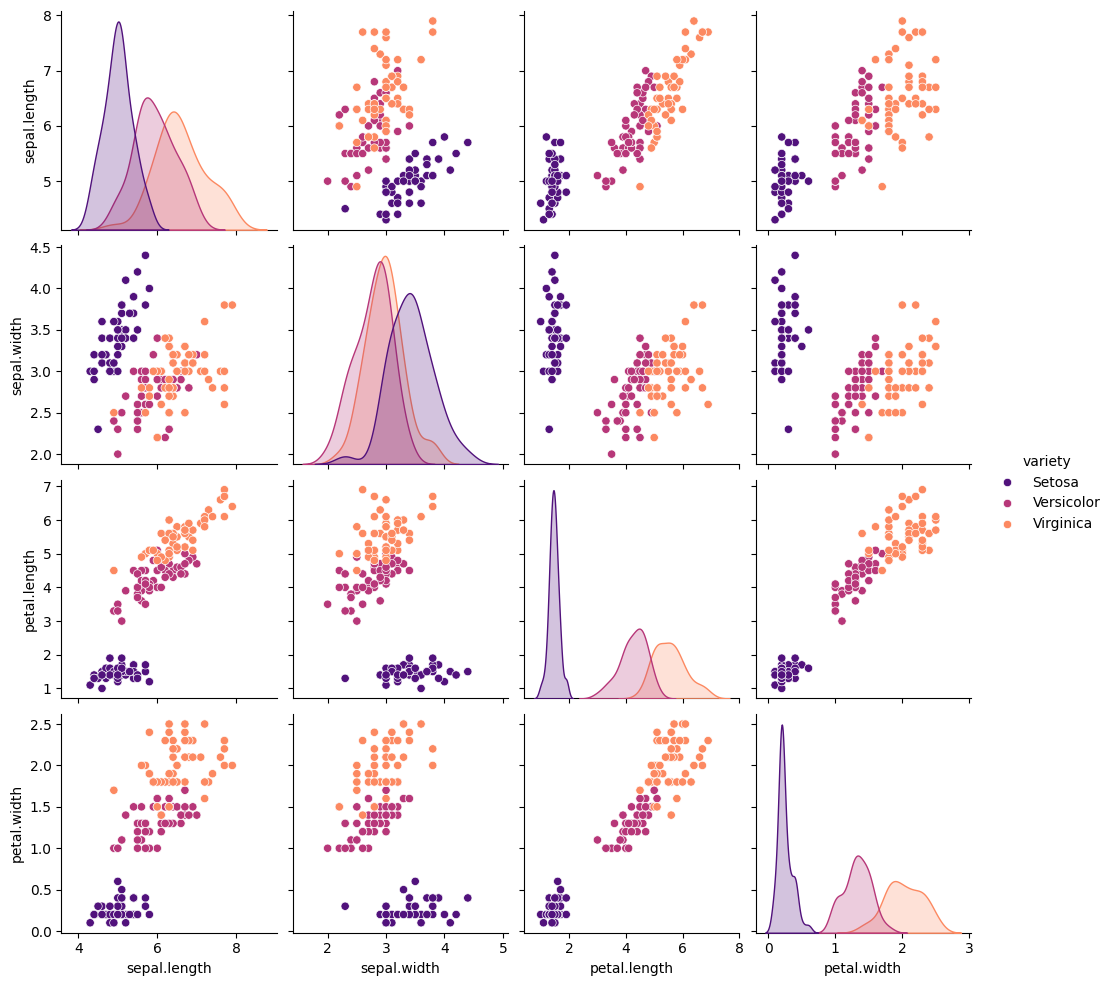

In [438]:
sns.pairplot(data_frame, hue="variety", kind='scatter', palette='magma')
# sns.pairplot(train_setosa_df, hue="variety", kind='scatter', palette='magma')


# Mean and Covariance
<div>
  <input type="checkbox" name="checkbox_3" checked>
  <label for="checkbox_3">3- Eğitim verilerini kullanarak her bir sınıf için ortalama vektörü ve kovaryans matrisi hesaplanır. Bu hesaplar ödev sahibi tarafından kendi kodu ile yapılmalıdır.</label>
</div>

## Mean and Covariance for Setosa

In [439]:
print('****** My Mean Calculation Code Result ******')
mean_setosa = utils.mean_vector(train_setosa_df.drop(['variety'], axis=1))
print("Mean Vector for Setosa: " + str(mean_setosa))

print(' ')
print('****** Pandas Mean Calculation Code Result ******')
mean_setosa = train_setosa_df.drop(['variety'], axis=1).mean()
print(mean_setosa)

# covariance_matrix_setosa = utils.covariance_matrix(train_setosa_df.drop(['variety'], axis=1))
# print("Covariance Matrix for Setosa: " + str(covariance_matrix_setosa))
covariance_matrix_setosa = train_setosa_df.drop(['variety'], axis=1).cov()
covariance_matrix_setosa


****** My Mean Calculation Code Result ******
Mean of column sepal.length is 5.045000000000001
Mean of column sepal.width is 3.435
Mean of column petal.length is 1.4649999999999996
Mean of column petal.width is 0.23499999999999996
Mean Vector for Setosa: [5.045000000000001, 3.435, 1.4649999999999996, 0.23499999999999996]
 
****** Pandas Mean Calculation Code Result ******
sepal.length    5.045
sepal.width     3.435
petal.length    1.465
petal.width     0.235
dtype: float64


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.130231,0.111974,0.017769,0.011718
sepal.width,0.111974,0.167974,0.013051,0.008231
petal.length,0.017769,0.013051,0.035154,0.006128
petal.width,0.011718,0.008231,0.006128,0.009513


## Mean and Covariance for Versicolor

In [440]:
print('****** My Mean Calculation Code Result ******')
mean_versicolor = utils.mean_vector(train_versicolor_df.drop(['variety'], axis=1))
print("Mean Vector for Versicolor: " + str(mean_versicolor))

print(' ')
print('****** Pandas Mean Calculation Code Result ******')
mean_versicolor = train_versicolor_df.drop(['variety'], axis=1).mean()
print(mean_versicolor)

# covariance_matrix_versicolor = utils.covariance_matrix(train_versicolor_df.drop(['variety'], axis=1))
# print("Covariance Matrix for Versicolor: " + str(covariance_matrix_versicolor))
covariance_matrix_versicolor = train_versicolor_df.drop(['variety'], axis=1).cov()
covariance_matrix_versicolor


****** My Mean Calculation Code Result ******
Mean of column sepal.length is 5.89
Mean of column sepal.width is 2.7525000000000004
Mean of column petal.length is 4.227500000000001
Mean of column petal.width is 1.3125
Mean Vector for Versicolor: [5.89, 2.7525000000000004, 4.227500000000001, 1.3125]
 
****** Pandas Mean Calculation Code Result ******
sepal.length    5.8900
sepal.width     2.7525
petal.length    4.2275
petal.width     1.3125
dtype: float64


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.262462,0.092590,0.185154,0.056026
sepal.width,0.092590,0.102558,0.096212,0.050609
petal.length,0.185154,0.096212,0.222045,0.072724
petal.width,0.056026,0.050609,0.072724,0.040609


## Mean and Covariance for Virginica

In [441]:
print('****** My Mean Calculation Code Result ******')
mean_virginica = utils.mean_vector(train_virginica_df.drop(['variety'], axis=1))
print("Mean Vector for Virginica: " + str(mean_virginica))

print(' ')
print('****** Pandas Mean Calculation Code Result ******')
mean_virginica = train_virginica_df.drop(['variety'], axis=1).mean()
print(mean_virginica)

# covariance_matrix_virginica = utils.covariance_matrix(train_virginica_df.drop(['variety'], axis=1))
# print("Covariance Matrix for Virginica: " + str(covariance_matrix_virginica))
covariance_matrix_virginica = train_virginica_df.drop(['variety'], axis=1).cov()
covariance_matrix_virginica


****** My Mean Calculation Code Result ******
Mean of column sepal.length is 6.6450000000000005
Mean of column sepal.width is 2.9825
Mean of column petal.length is 5.612499999999999
Mean of column petal.width is 2.009999999999999
Mean Vector for Virginica: [6.6450000000000005, 2.9825, 5.612499999999999, 2.009999999999999]
 
****** Pandas Mean Calculation Code Result ******
sepal.length    6.6450
sepal.width     2.9825
petal.length    5.6125
petal.width     2.0100
dtype: float64


,sepal.length,sepal.width,petal.length,petal.width
sepal.length,0.388692,0.073372,0.295577,0.039282
sepal.width,0.073372,0.102506,0.052532,0.044026
petal.length,0.295577,0.052532,0.303686,0.038590
petal.width,0.039282,0.044026,0.038590,0.075282


# Mahalanobis Distance
  <input type="checkbox" name="checkbox_4" checked>
  <label for="checkbox_4">4- Test verisindeki her bir örnek elde edilen ortalama vektörleri ve kovaryans matrislerini
kullanarak Mahalanobis uzaklığı hesaplanır. En düşük uzaklığa sahip olan sınıf tahmin
edilen sınıf olarak belirlenir.</label>
</div>

$$ D_{Mah}(x,y)=\sqrt{(x-y)^{T}\Sigma^{-1}(x-y)} $$

Aşağıdaki fonksiyon ile Mahalanobis uzaklığı ve sınıf tahmini yapılır.

In [442]:
def predict_mahalanobis_variety(test_df):
    test_df_with_prediction = test_df.copy()
    MAHALANOBIS_COL = 'predicted_mahalanobis_variety'
    VARIETY_COL = 'variety'
    test_df_with_prediction[MAHALANOBIS_COL] = ''

    for index, row in test_df_with_prediction.iterrows():
        mahalanobis_distance_to_setosa = distance.mahalanobis(row.drop([VARIETY_COL, MAHALANOBIS_COL]), mean_setosa, np.linalg.inv(covariance_matrix_setosa))
        mahalanobis_distance_to_versicolor = distance.mahalanobis(row.drop([VARIETY_COL, MAHALANOBIS_COL]), mean_versicolor, np.linalg.inv(covariance_matrix_versicolor))
        mahalanobis_distance_to_virginica = distance.mahalanobis(row.drop([VARIETY_COL, MAHALANOBIS_COL]), mean_virginica, np.linalg.inv(covariance_matrix_virginica))

        if mahalanobis_distance_to_setosa < mahalanobis_distance_to_versicolor and mahalanobis_distance_to_setosa < mahalanobis_distance_to_virginica:
            test_df_with_prediction.at[index, MAHALANOBIS_COL] = 'Setosa'
        elif mahalanobis_distance_to_versicolor < mahalanobis_distance_to_setosa and mahalanobis_distance_to_versicolor < mahalanobis_distance_to_virginica:
            test_df_with_prediction.at[index, MAHALANOBIS_COL] = 'Versicolor'
        else:
            test_df_with_prediction.at[index, MAHALANOBIS_COL] = 'Virginica'

    return test_df_with_prediction


## Mahalanobis Distance for Setosa

In [443]:
test_setosa_df_with_mahalanobis_prediction = predict_mahalanobis_variety(test_setosa_df).sort_index()
test_setosa_df_with_mahalanobis_prediction


,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_mahalanobis_variety
2,4.7,3.2,1.3,0.2,Setosa,Setosa
3,4.6,3.1,1.5,0.2,Setosa,Setosa
6,4.6,3.4,1.4,0.3,Setosa,Setosa
17,5.1,3.5,1.4,0.3,Setosa,Setosa
19,5.1,3.8,1.5,0.3,Setosa,Setosa
21,5.1,3.7,1.5,0.4,Setosa,Setosa
28,5.2,3.4,1.4,0.2,Setosa,Setosa
29,4.7,3.2,1.6,0.2,Setosa,Setosa
42,4.4,3.2,1.3,0.2,Setosa,Setosa
43,5.0,3.5,1.6,0.6,Setosa,Setosa


## Mahalanobis Distance for Versicolor

In [444]:
test_versicolor_df_with_mahalanobis_prediction = predict_mahalanobis_variety(test_versicolor_df).sort_index()
test_versicolor_df_with_mahalanobis_prediction


,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_mahalanobis_variety
50,7.0,3.2,4.7,1.4,Versicolor,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor,Versicolor
61,5.9,3.0,4.2,1.5,Versicolor,Versicolor
68,6.2,2.2,4.5,1.5,Versicolor,Virginica
79,5.7,2.6,3.5,1.0,Versicolor,Versicolor
83,6.0,2.7,5.1,1.6,Versicolor,Virginica
88,5.6,3.0,4.1,1.3,Versicolor,Versicolor
95,5.7,3.0,4.2,1.2,Versicolor,Versicolor
99,5.7,2.8,4.1,1.3,Versicolor,Versicolor


## Mahalanobis Distance for Virginica

In [445]:

test_virginica_df_with_mahalanobis_prediction = predict_mahalanobis_variety(test_virginica_df).sort_index()
test_virginica_df_with_mahalanobis_prediction


,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_mahalanobis_variety
106,4.9,2.5,4.5,1.7,Virginica,Virginica
109,7.2,3.6,6.1,2.5,Virginica,Virginica
114,5.8,2.8,5.1,2.4,Virginica,Virginica
120,6.9,3.2,5.7,2.3,Virginica,Virginica
123,6.3,2.7,4.9,1.8,Virginica,Virginica
127,6.1,3.0,4.9,1.8,Virginica,Virginica
128,6.4,2.8,5.6,2.1,Virginica,Virginica
139,6.9,3.1,5.4,2.1,Virginica,Virginica
143,6.8,3.2,5.9,2.3,Virginica,Virginica
146,6.3,2.5,5.0,1.9,Virginica,Virginica


# Euclidean Distance
<div>
  <input type="checkbox" name="checkbox_4" checked>
  <label for="checkbox_4">5- 4’teki adım Öklid uzaklığı ile hesaplanır ve performans sınıflandırma başarım metrikleriyle (doğruluk, kesinlik vb.) karşılaştırılır.</label>
</div>

$$ d_{Euc}\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $$
Where,
* p, q = two points in Euclidean n-space
* q_i, p_i = Euclidean vectors, starting from the origin of the space (initial point)
* n = n-space

Aşağıdaki fonksiyon ile öklid uzaklığı ve sınıf tahmini yapılır.

In [446]:
def predict_euclidean_variety(test_df):
    test_df_with_prediction = test_df.copy()
    EUCLIDEAN_COL = 'predicted_euclidean_variety'
    VARIETY_COL = 'variety'
    test_df_with_prediction[EUCLIDEAN_COL] = ''

    for index, row in test_df_with_prediction.iterrows():
        euclidean_distance_to_setosa = distance.euclidean(row.drop([VARIETY_COL, EUCLIDEAN_COL]), mean_setosa)
        euclidean_distance_to_versicolor = distance.euclidean(row.drop([VARIETY_COL, EUCLIDEAN_COL]), mean_versicolor)
        euclidean_distance_to_virginica = distance.euclidean(row.drop([VARIETY_COL, EUCLIDEAN_COL]), mean_virginica)

        if euclidean_distance_to_setosa < euclidean_distance_to_versicolor and euclidean_distance_to_setosa < euclidean_distance_to_virginica:
            test_df_with_prediction.at[index, EUCLIDEAN_COL] = 'Setosa'
        elif euclidean_distance_to_versicolor < euclidean_distance_to_setosa and euclidean_distance_to_versicolor < euclidean_distance_to_virginica:
            test_df_with_prediction.at[index, EUCLIDEAN_COL] = 'Versicolor'
        else:
            test_df_with_prediction.at[index, EUCLIDEAN_COL] = 'Virginica'

    return test_df_with_prediction


## Euclidean Distance for Setosa

In [447]:
test_setosa_df_with_euclidean_prediction = predict_euclidean_variety(test_setosa_df).sort_index()
test_setosa_df_with_euclidean_prediction


,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_euclidean_variety
2,4.7,3.2,1.3,0.2,Setosa,Setosa
3,4.6,3.1,1.5,0.2,Setosa,Setosa
6,4.6,3.4,1.4,0.3,Setosa,Setosa
17,5.1,3.5,1.4,0.3,Setosa,Setosa
19,5.1,3.8,1.5,0.3,Setosa,Setosa
21,5.1,3.7,1.5,0.4,Setosa,Setosa
28,5.2,3.4,1.4,0.2,Setosa,Setosa
29,4.7,3.2,1.6,0.2,Setosa,Setosa
42,4.4,3.2,1.3,0.2,Setosa,Setosa
43,5.0,3.5,1.6,0.6,Setosa,Setosa


## Euclidean Distance for Versicolor

In [448]:
test_versicolor_df_with_euclidean_prediction = predict_euclidean_variety(test_versicolor_df).sort_index()
test_versicolor_df_with_euclidean_prediction


,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_euclidean_variety
50,7.0,3.2,4.7,1.4,Versicolor,Virginica
52,6.9,3.1,4.9,1.5,Versicolor,Virginica
54,6.5,2.8,4.6,1.5,Versicolor,Versicolor
61,5.9,3.0,4.2,1.5,Versicolor,Versicolor
68,6.2,2.2,4.5,1.5,Versicolor,Versicolor
79,5.7,2.6,3.5,1.0,Versicolor,Versicolor
83,6.0,2.7,5.1,1.6,Versicolor,Versicolor
88,5.6,3.0,4.1,1.3,Versicolor,Versicolor
95,5.7,3.0,4.2,1.2,Versicolor,Versicolor
99,5.7,2.8,4.1,1.3,Versicolor,Versicolor


## Euclidean Distance for Virginica

In [449]:
test_virginica_df_with_euclidean_prediction = predict_euclidean_variety(test_virginica_df).sort_index()
test_virginica_df_with_euclidean_prediction


,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_euclidean_variety
106,4.9,2.5,4.5,1.7,Virginica,Versicolor
109,7.2,3.6,6.1,2.5,Virginica,Virginica
114,5.8,2.8,5.1,2.4,Virginica,Virginica
120,6.9,3.2,5.7,2.3,Virginica,Virginica
123,6.3,2.7,4.9,1.8,Virginica,Virginica
127,6.1,3.0,4.9,1.8,Virginica,Versicolor
128,6.4,2.8,5.6,2.1,Virginica,Virginica
139,6.9,3.1,5.4,2.1,Virginica,Virginica
143,6.8,3.2,5.9,2.3,Virginica,Virginica
146,6.3,2.5,5.0,1.9,Virginica,Virginica


# Correct and Incorrect Variety

<div>
  <input type="checkbox" name="checkbox_4" checked>
  <label for="checkbox_4">6- Doğru ve hatalı örnekler çizim üzerinde görselleştirilerek sonuçlar karşılaştırılır.</label>
</div>

**True Positive (TP):**
* Definition: Instances that are actually positive and are correctly classified as positive by the model.
* Example: The model correctly identifies an email as spam, and it is indeed spam.

**False Positive (FP):**
* Definition: Instances that are actually negative but are incorrectly classified as positive by the model.
* Example: The model incorrectly identifies a legitimate email as spam.

**True Negative (TN):**
* Definition: Instances that are actually negative and are correctly classified as negative by the model.
* Example: The model correctly identifies a non-spam email as not spam.

**False Negative (FN):**
* Definition: Instances that are actually positive but are incorrectly classified as negative by the model.
* Example: The model incorrectly classifies a spam email as not spam.

**Accuracy** = (TP+TN) / (TP+TN+FP+FN)

**Precision (Positive Predictive Value)** = TP / (TP+FP)

**Recall (Sensitivity, True Positive Rate)** = TP / (TP+FN)
​


In [450]:
def label_predictions(data_frame, column_to_be_compare, generated_column_name):
    labeled_df = data_frame.copy()
    labeled_df[generated_column_name] = ''

    for index, row in data_frame.iterrows():
        if row['variety'] == row[column_to_be_compare]:
            labeled_df.at[index, generated_column_name] = 'True Positive (TP)'
        else:
            labeled_df.at[index, generated_column_name] = 'False Negative (FN)'
        
    return labeled_df


## Setosa Correct and Incorrect Variety
Aşağıda görüldüğü üzere;
* Setosa sınıfında 10 örnek doğru, 0 örnek yanlış tahmin edilmiştir.
* Eucledian ve Mahalanobis %100 doğru tahmin etmiştir.

**Accuracy** = (TP+TN) / (TP+TN+FP+FN) = 100%

**Precision (Positive Predictive Value)** = TP / (TP+FP) = 100%

**Recall (Sensitivity, True Positive Rate)** = TP / (TP+FN) = 100%

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_mahalanobis_variety,setosa mahalanobis prediction
2,4.7,3.2,1.3,0.2,Setosa,Setosa,True Positive (TP)
3,4.6,3.1,1.5,0.2,Setosa,Setosa,True Positive (TP)
6,4.6,3.4,1.4,0.3,Setosa,Setosa,True Positive (TP)
17,5.1,3.5,1.4,0.3,Setosa,Setosa,True Positive (TP)
19,5.1,3.8,1.5,0.3,Setosa,Setosa,True Positive (TP)
21,5.1,3.7,1.5,0.4,Setosa,Setosa,True Positive (TP)
28,5.2,3.4,1.4,0.2,Setosa,Setosa,True Positive (TP)
29,4.7,3.2,1.6,0.2,Setosa,Setosa,True Positive (TP)
42,4.4,3.2,1.3,0.2,Setosa,Setosa,True Positive (TP)
43,5.0,3.5,1.6,0.6,Setosa,Setosa,True Positive (TP)


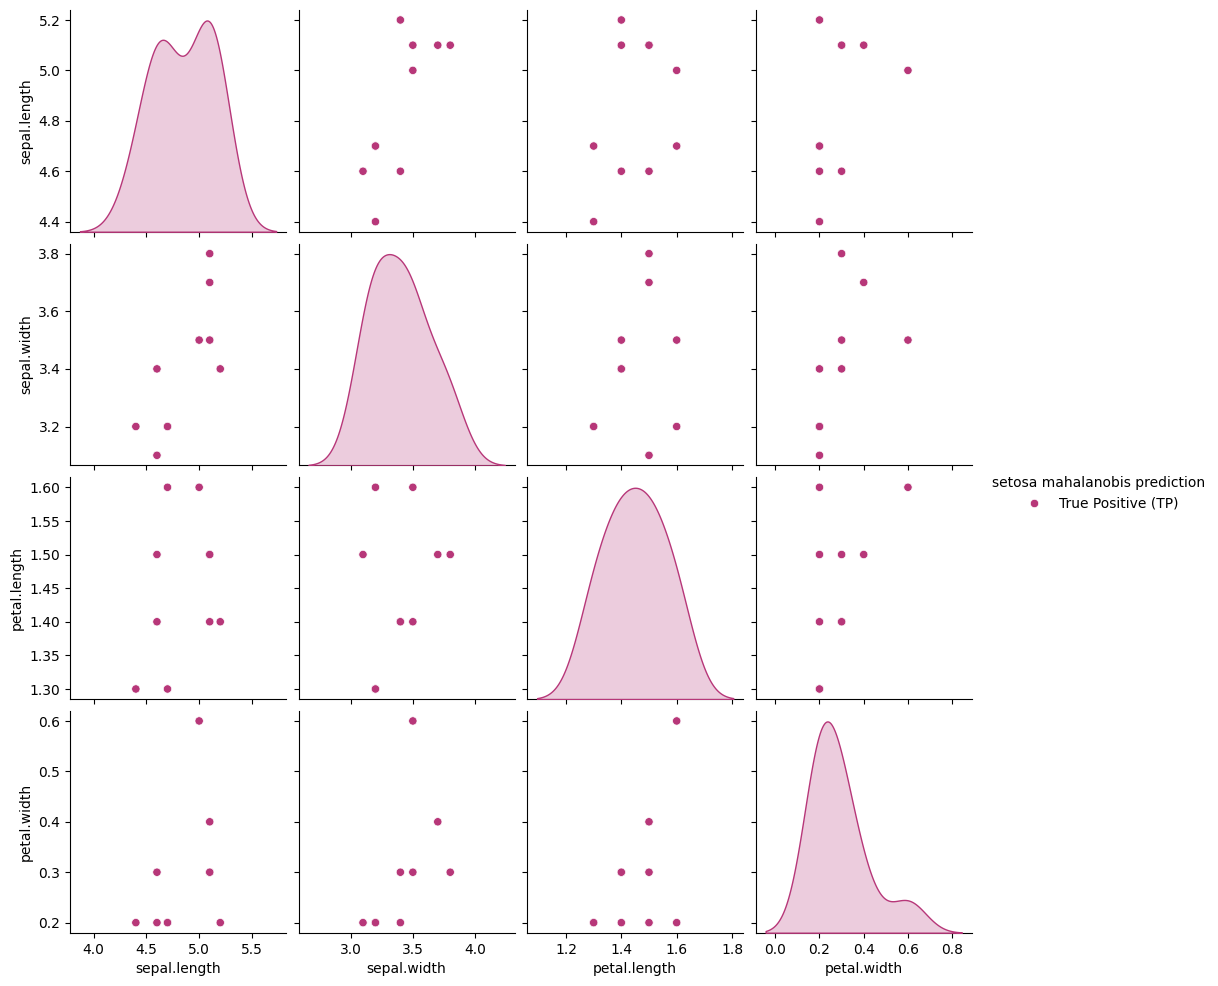

In [451]:
result_df = label_predictions(test_setosa_df_with_mahalanobis_prediction, 'predicted_mahalanobis_variety', 'setosa mahalanobis prediction')
sns.pairplot(result_df, hue='setosa mahalanobis prediction', kind='scatter', palette='magma')
result_df


Aşağıda görüldüğü üzere;
* Setosa sınıfında 10 örnek doğru, 0 örnek yanlış tahmin edilmiştir.

**Accuracy** = (TP+TN) / (TP+TN+FP+FN) = 100%

**Precision (Positive Predictive Value)** = TP / (TP+FP) = 100%

**Recall (Sensitivity, True Positive Rate)** = TP / (TP+FN) = 100%

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_euclidean_variety,setosa euclidean prediction
2,4.7,3.2,1.3,0.2,Setosa,Setosa,True Positive (TP)
3,4.6,3.1,1.5,0.2,Setosa,Setosa,True Positive (TP)
6,4.6,3.4,1.4,0.3,Setosa,Setosa,True Positive (TP)
17,5.1,3.5,1.4,0.3,Setosa,Setosa,True Positive (TP)
19,5.1,3.8,1.5,0.3,Setosa,Setosa,True Positive (TP)
21,5.1,3.7,1.5,0.4,Setosa,Setosa,True Positive (TP)
28,5.2,3.4,1.4,0.2,Setosa,Setosa,True Positive (TP)
29,4.7,3.2,1.6,0.2,Setosa,Setosa,True Positive (TP)
42,4.4,3.2,1.3,0.2,Setosa,Setosa,True Positive (TP)
43,5.0,3.5,1.6,0.6,Setosa,Setosa,True Positive (TP)


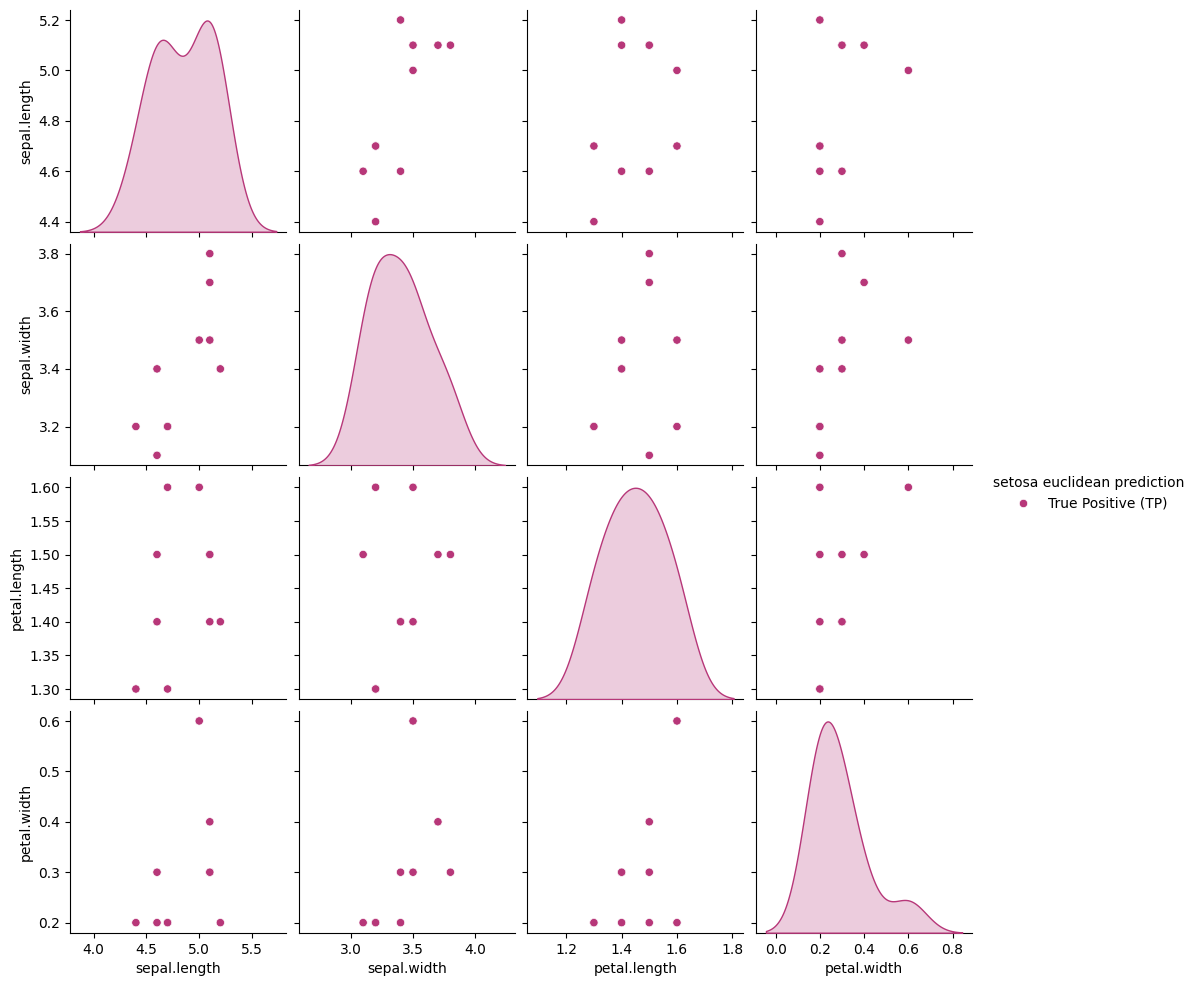

In [452]:

result_df = label_predictions(test_setosa_df_with_euclidean_prediction, 'predicted_euclidean_variety', 'setosa euclidean prediction')
sns.pairplot(result_df, hue='setosa euclidean prediction', kind='scatter', palette='magma')
result_df


# Versicolor Correct and Incorrect Variety
Aşağıda görüldüğü üzere;
* Versicolor sınıfında mahalanobis 8 örnek doğru, 2 örnek yanlış tahmin edilmiştir. %80 performans göstermiştir.

**Accuracy** = (TP+TN) / (TP+TN+FP+FN) = 80%

**Precision (Positive Predictive Value)** = TP / (TP+FP) = 100%

**Recall (Sensitivity, True Positive Rate)** = TP / (TP+FN) = 80%



,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_mahalanobis_variety,versicolor mahalanobis prediction
50,7.0,3.2,4.7,1.4,Versicolor,Versicolor,True Positive (TP)
52,6.9,3.1,4.9,1.5,Versicolor,Versicolor,True Positive (TP)
54,6.5,2.8,4.6,1.5,Versicolor,Versicolor,True Positive (TP)
61,5.9,3.0,4.2,1.5,Versicolor,Versicolor,True Positive (TP)
68,6.2,2.2,4.5,1.5,Versicolor,Virginica,False Negative (FN)
79,5.7,2.6,3.5,1.0,Versicolor,Versicolor,True Positive (TP)
83,6.0,2.7,5.1,1.6,Versicolor,Virginica,False Negative (FN)
88,5.6,3.0,4.1,1.3,Versicolor,Versicolor,True Positive (TP)
95,5.7,3.0,4.2,1.2,Versicolor,Versicolor,True Positive (TP)
99,5.7,2.8,4.1,1.3,Versicolor,Versicolor,True Positive (TP)


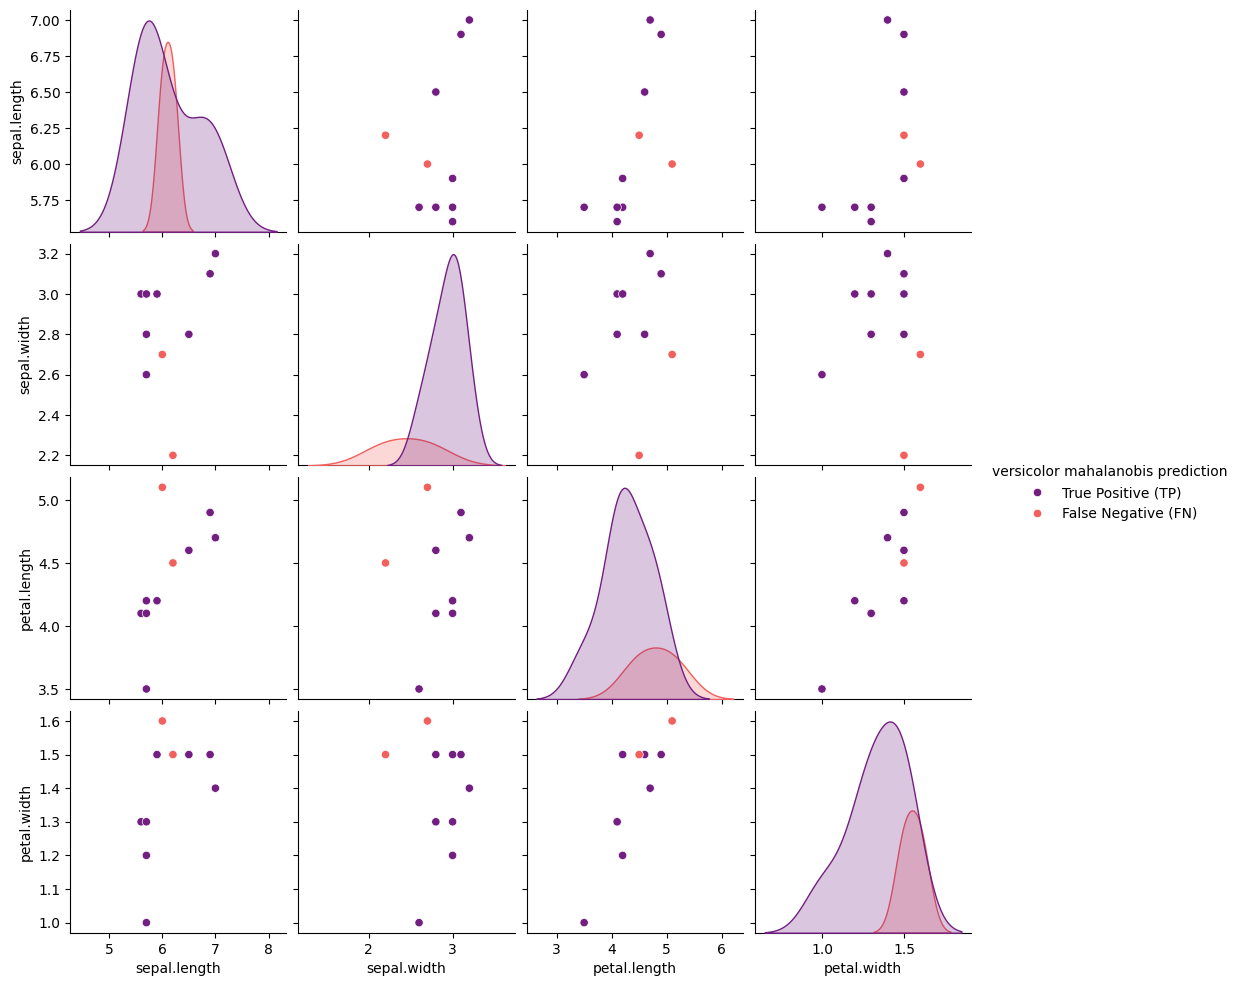

In [453]:
result_df = label_predictions(test_versicolor_df_with_mahalanobis_prediction, 'predicted_mahalanobis_variety', 'versicolor mahalanobis prediction')
sns.pairplot(result_df, hue='versicolor mahalanobis prediction', kind='scatter', palette='magma')
result_df


Aşağıda görüldüğü üzere;
* Versicolor sınıfında eucledian 8 örnek doğru, 2 örnek yanlış tahmin edilmiştir. %80 performans göstermiştir.

**Accuracy** = (TP+TN) / (TP+TN+FP+FN) = 80%

**Precision (Positive Predictive Value)** = TP / (TP+FP) = 100%

**Recall (Sensitivity, True Positive Rate)** = TP / (TP+FN) = 80%

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_euclidean_variety,versicolor euclidean prediction
50,7.0,3.2,4.7,1.4,Versicolor,Virginica,False Negative (FN)
52,6.9,3.1,4.9,1.5,Versicolor,Virginica,False Negative (FN)
54,6.5,2.8,4.6,1.5,Versicolor,Versicolor,True Positive (TP)
61,5.9,3.0,4.2,1.5,Versicolor,Versicolor,True Positive (TP)
68,6.2,2.2,4.5,1.5,Versicolor,Versicolor,True Positive (TP)
79,5.7,2.6,3.5,1.0,Versicolor,Versicolor,True Positive (TP)
83,6.0,2.7,5.1,1.6,Versicolor,Versicolor,True Positive (TP)
88,5.6,3.0,4.1,1.3,Versicolor,Versicolor,True Positive (TP)
95,5.7,3.0,4.2,1.2,Versicolor,Versicolor,True Positive (TP)
99,5.7,2.8,4.1,1.3,Versicolor,Versicolor,True Positive (TP)


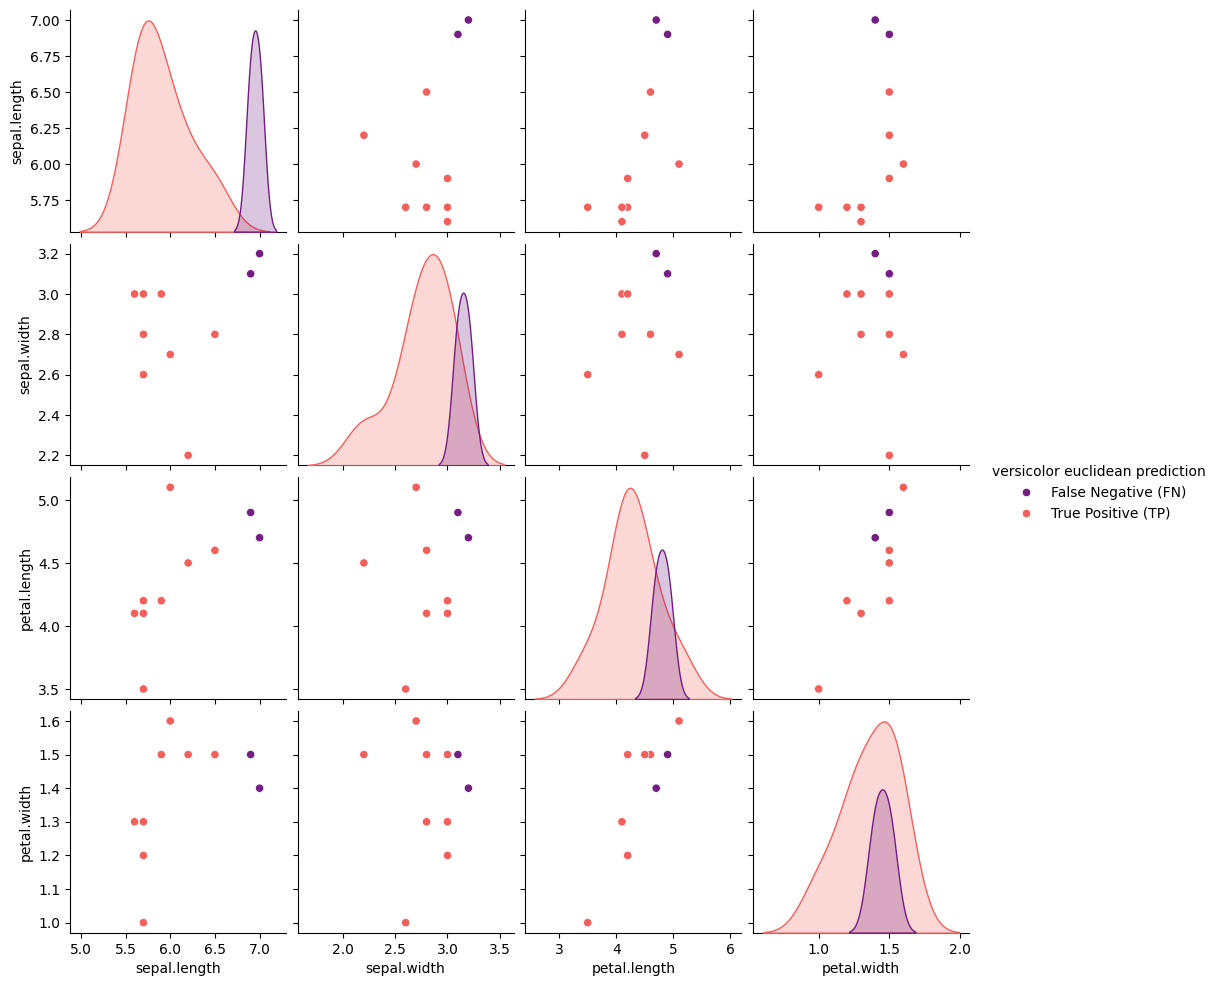

In [454]:
result_df = label_predictions(test_versicolor_df_with_euclidean_prediction, 'predicted_euclidean_variety', 'versicolor euclidean prediction')
sns.pairplot(result_df, hue='versicolor euclidean prediction', kind='scatter', palette='magma')
result_df


# Virginica Correct and Incorrect Variety
Aşağıda görüldüğü üzere;
* Virginica sınıfında mahalanobis 10 örnek doğru, 0 örnek yanlış tahmin edilmiştir. %100 performans göstermiştir.

**Accuracy** = (TP+TN) / (TP+TN+FP+FN) = 100%

**Precision (Positive Predictive Value)** = TP / (TP+FP) = 100%

**Recall (Sensitivity, True Positive Rate)** = TP / (TP+FN) = 100%


,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_mahalanobis_variety,virginica mahalanobis prediction
106,4.9,2.5,4.5,1.7,Virginica,Virginica,True Positive (TP)
109,7.2,3.6,6.1,2.5,Virginica,Virginica,True Positive (TP)
114,5.8,2.8,5.1,2.4,Virginica,Virginica,True Positive (TP)
120,6.9,3.2,5.7,2.3,Virginica,Virginica,True Positive (TP)
123,6.3,2.7,4.9,1.8,Virginica,Virginica,True Positive (TP)
127,6.1,3.0,4.9,1.8,Virginica,Virginica,True Positive (TP)
128,6.4,2.8,5.6,2.1,Virginica,Virginica,True Positive (TP)
139,6.9,3.1,5.4,2.1,Virginica,Virginica,True Positive (TP)
143,6.8,3.2,5.9,2.3,Virginica,Virginica,True Positive (TP)
146,6.3,2.5,5.0,1.9,Virginica,Virginica,True Positive (TP)


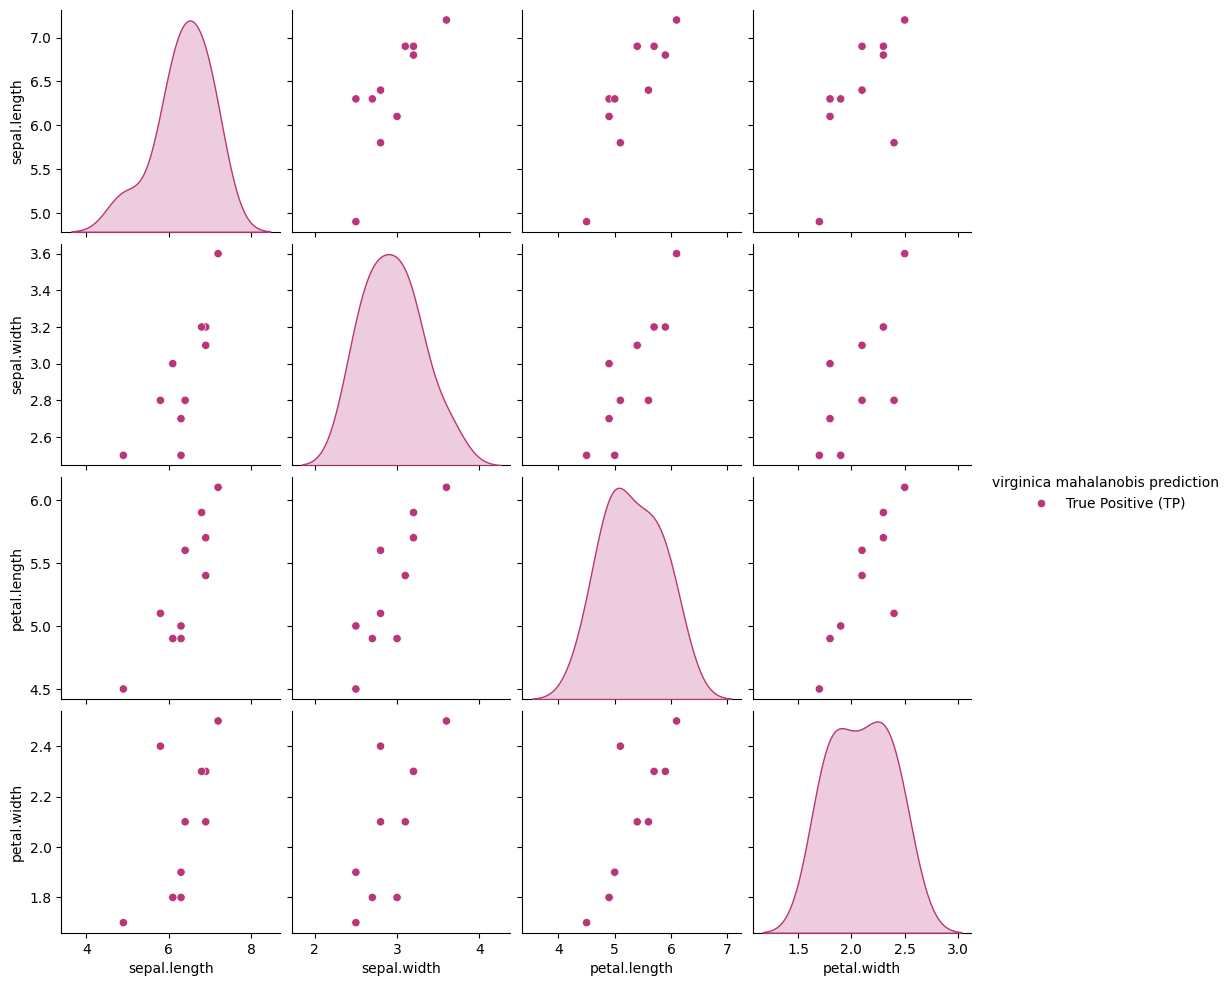

In [455]:
result_df = label_predictions(test_virginica_df_with_mahalanobis_prediction, 'predicted_mahalanobis_variety', 'virginica mahalanobis prediction')
sns.pairplot(result_df, hue='virginica mahalanobis prediction', kind='scatter', palette='magma')
result_df


Aşağıda görüldüğü üzere;
* Virginica sınıfında eucledian 80 örnek doğru, 2 örnek yanlış tahmin edilmiştir. %80 performans göstermiştir.

**Accuracy** = (TP+TN) / (TP+TN+FP+FN) = 80%

**Precision (Positive Predictive Value)** = TP / (TP+FP) = 100%

**Recall (Sensitivity, True Positive Rate)** = TP / (TP+FN) = 80%

,sepal.length,sepal.width,petal.length,petal.width,variety,predicted_euclidean_variety,virginica euclidean prediction
106,4.9,2.5,4.5,1.7,Virginica,Versicolor,False Negative (FN)
109,7.2,3.6,6.1,2.5,Virginica,Virginica,True Positive (TP)
114,5.8,2.8,5.1,2.4,Virginica,Virginica,True Positive (TP)
120,6.9,3.2,5.7,2.3,Virginica,Virginica,True Positive (TP)
123,6.3,2.7,4.9,1.8,Virginica,Virginica,True Positive (TP)
127,6.1,3.0,4.9,1.8,Virginica,Versicolor,False Negative (FN)
128,6.4,2.8,5.6,2.1,Virginica,Virginica,True Positive (TP)
139,6.9,3.1,5.4,2.1,Virginica,Virginica,True Positive (TP)
143,6.8,3.2,5.9,2.3,Virginica,Virginica,True Positive (TP)
146,6.3,2.5,5.0,1.9,Virginica,Virginica,True Positive (TP)


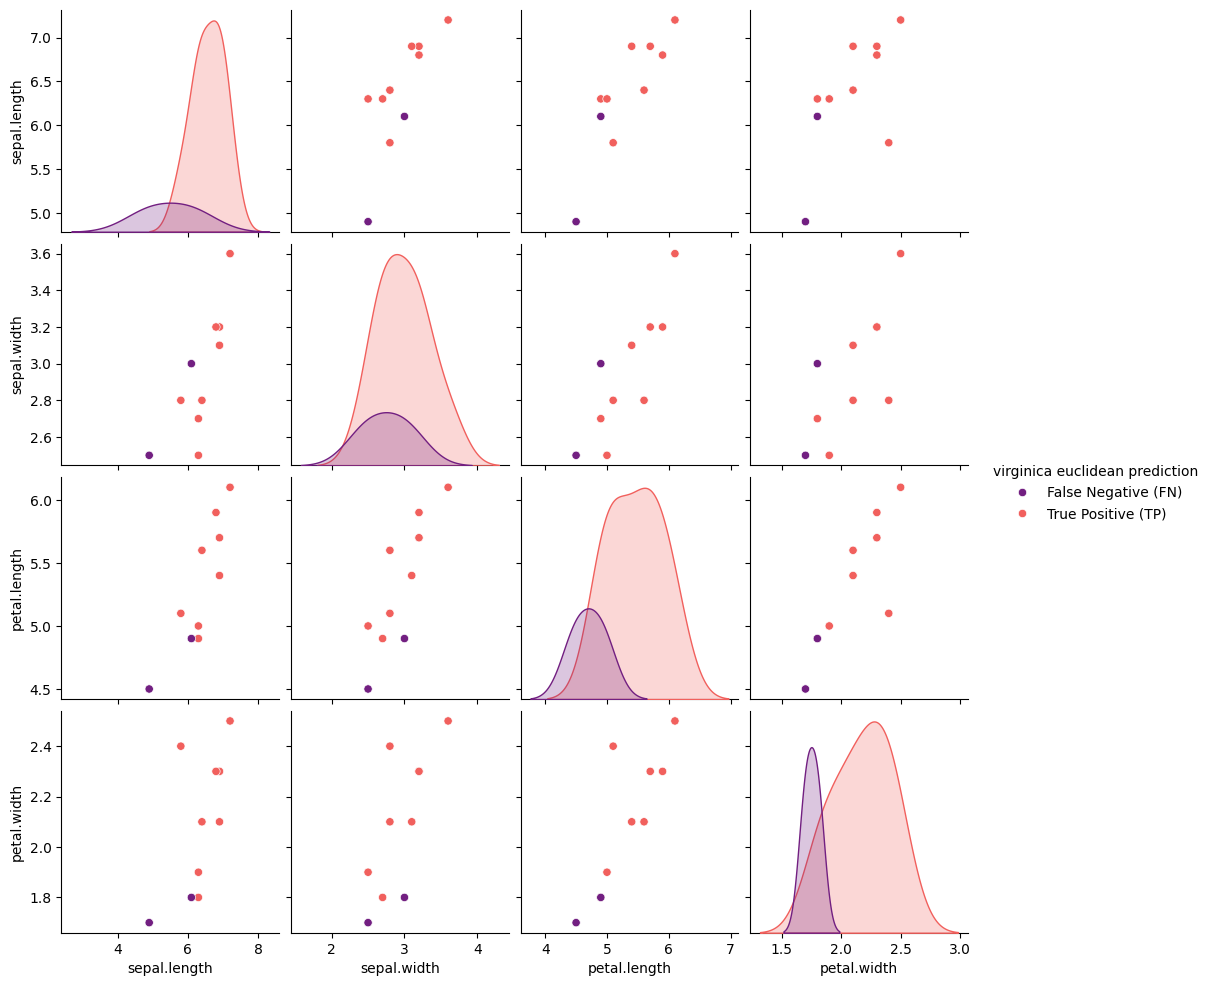

In [456]:
result_df = label_predictions(test_virginica_df_with_euclidean_prediction, 'predicted_euclidean_variety', 'virginica euclidean prediction')
sns.pairplot(result_df, hue='virginica euclidean prediction', kind='scatter', palette='magma')
result_df
